In [1]:
%load_ext kedro.ipython


[10/24/25 17:42:28] INFO     Using 'C:\Users\sebas\OneDrive\Desktop\MACHINE                         __init__.py:270
                             LEARNING\Kedro\nba\.venv\Lib\site-packages\kedro\framework\project\ric                
                             h_logging.yml' as logging configuration.                                              

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:63

                    INFO     Registered line magic '%load_node'                                      __init__.py:65

                    INFO     Resolved project path as: C:\Users\sebas\OneDrive\Desktop\MACHINE      __init__.py:180
                             LEARNING\Kedro\nba.                                                                   
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/24/25 17:42:32] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:243
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/24/25 17:42:33] INFO     Kedro project NBA                                                      __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

In [2]:
# =============================================================================
# 1. IMPORTAR LIBRERÍAS
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [3]:
df=catalog.load("data_engineering.games_teams_details")

                    INFO     Loading data from data_engineering.games_teams_details            data_catalog.py:1046
                             (ParquetDataset)...                                                                   

In [4]:
pd.set_option('display.max_columns', None)
df.head()


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST,HOME_TEAM_ID,AWAY_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,YEAR,MONTH,DAY_OF_WEEK,POINT_DIFFERENTIAL,TOTAL_POINTS,MARGIN_OF_VICTORY,TEAM_TYPE,NICKNAME_team,YEARFOUNDED,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,None,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022-12-22,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,True,2022,12,3,9.0,243.0,9.0,AWAY,Spurs,1976,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,None,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.7,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022-12-22,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,True,2022,12,3,9.0,243.0,9.0,AWAY,Spurs,1976,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,None,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022-12-22,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,True,2022,12,3,9.0,243.0,9.0,AWAY,Spurs,1976,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,None,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.0,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022-12-22,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,True,2022,12,3,9.0,243.0,9.0,AWAY,Spurs,1976,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,None,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022-12-22,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,True,2022,12,3,9.0,243.0,9.0,AWAY,Spurs,1976,AT&T Center,18694.0,Peter Holt,Brian Wright,Gregg Popovich,Austin Spurs


In [5]:
# =============================================================================
# 2. CONFIGURACIÓN DE PARÁMETROS PARA GRIDSEARCH
# =============================================================================
GRIDSEARCH_PARAMS = {
    'random_forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'gradient_boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__subsample': [0.8, 1.0]
    },
    'svr': {
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['rbf', 'linear'],
        'model__gamma': ['scale', 'auto']
    },
    'ridge': {
        'model__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'lasso': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0]
    },
    'elastic_net': {
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.2, 0.5, 0.8]
    },
    'knn': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    }
}

# Configuración general
RANDOM_STATE = 42
CV_FOLDS = 5
TEST_SIZE = 0.2

print("✅ Parámetros de GridSearch configurados")

✅ Parámetros de GridSearch configurados


In [6]:
# =============================================================================
# 3. PREPARACIÓN DE DATOS CORREGIDA (CON EQUIPOS)
# =============================================================================
print("📊 Dimensiones del dataset:", df.shape)

# 🎯 MANTENER COLUMNAS DE EQUIPOS EN LA PREPARACIÓN
FEATURES = [
    'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
    'YEAR', 'MONTH', 'ARENACAPACITY', 'YEARFOUNDED', 'HOME_TEAM_WINS'
]

# 🎯 INCLUIR COLUMNAS DE IDENTIFICACIÓN DE EQUIPOS
TEAM_IDENTIFIERS = ['TEAM_ABBREVIATION', 'TEAM_ID', 'TEAM_CITY']

TARGETS = {
    'local_strength': 'PTS_home',
    'away_weakness': 'PTS_away', 
    'point_differential': 'POINT_DIFFERENTIAL',
    'home_advantage': 'HOME_TEAM_WINS'
}

# 🎯 LIMPIAR DATOS MANTENIENDO EQUIPOS
columnas_necesarias = FEATURES + list(TARGETS.values()) + TEAM_IDENTIFIERS
df_clean = df[columnas_necesarias].dropna()

# 🎯 MUESTREO MANTENIENDO EQUIPOS
df_clean = df_clean.sample(n=10000, random_state=42, replace=False)

print(f"✅ Datos preparados: {df_clean.shape[0]} muestras")
print(f"🎯 Equipos únicos en la muestra: {df_clean['TEAM_ABBREVIATION'].nunique()}")
print(f"🔍 Primeros equipos: {df_clean['TEAM_ABBREVIATION'].unique()[:10]}")

📊 Dimensiones del dataset: (669560, 61)
✅ Datos preparados: 10000 muestras
🎯 Equipos únicos en la muestra: 27
🔍 Primeros equipos: ['TOR' 'HOU' 'UTA' 'OKC' 'CHA' 'SAS' 'CLE' 'DAL' 'GSW' 'MIL']


In [7]:
# =============================================================================
# 4. FUNCIÓN CORREGIDA - CON TRAIN/TEST SPLIT REAL
# =============================================================================
def evaluate_models_with_gridsearch(X, y, target_name, params_dict=GRIDSEARCH_PARAMS):
    """
    Evalúa múltiples modelos con GridSearchCV y cross-validation
    """
    print(f"\n{'='*60}")
    print(f"🎯 ENTRENANDO MODELOS PARA: {target_name.upper()}")
    print(f"{'='*60}")
    
    # 🎯 🎯 🎯 AGREGAR SPLIT REAL TRAIN/TEST 🎯 🎯 🎯
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    print(f"📊 Train: {X_train.shape}, Test: {X_test.shape}")
    
    # Definir modelos
    models = {
        'random_forest': RandomForestRegressor(random_state=RANDOM_STATE),
        'gradient_boosting': GradientBoostingRegressor(random_state=RANDOM_STATE),
        'svr': SVR(),
        'ridge': Ridge(random_state=RANDOM_STATE),
        'lasso': Lasso(random_state=RANDOM_STATE),
        'elastic_net': ElasticNet(random_state=RANDOM_STATE),
        'knn': KNeighborsRegressor()
    }
    
    results = {}
    best_score = -np.inf
    best_model = None
    best_model_name = ""
    
    for model_name, model in models.items():
        print(f"\n🔧 Entrenando {model_name.upper()}...")
        
        try:
            # Crear pipeline con escalado
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])
            
            # Configurar GridSearchCV
            grid_search = GridSearchCV(
                pipeline,
                params_dict[model_name],
                cv=CV_FOLDS,
                scoring='r2',
                n_jobs=-1,
                verbose=0
            )
            
            # 🎯 🎯 🎯 CAMBIAR: Entrenar solo con TRAIN 🎯 🎯 🎯
            grid_search.fit(X_train, y_train)
            
            # Mejores parámetros
            best_params = grid_search.best_params_
            best_score_cv = grid_search.best_score_
            
            # 🎯 🎯 🎯 CAMBIAR: Predecir solo con TEST 🎯 🎯 🎯
            y_pred = grid_search.predict(X_test)
            
            # Métricas en TEST (no en entrenamiento)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            
            # Guardar resultados
            results[model_name] = {
                'best_params': best_params,
                'cv_score': best_score_cv,
                'test_r2': r2,
                'test_mae': mae,
                'test_mse': mse,
                'model': grid_search.best_estimator_,
                'grid_search': grid_search
            }
            
            print(f"   ✅ CV R²: {best_score_cv:.4f} | Test R²: {r2:.4f} | MAE: {mae:.4f}")
            print(f"   ⚙️  Mejores parámetros: {best_params}")
            
            if r2 > best_score:
                best_score = r2
                best_model = grid_search.best_estimator_
                best_model_name = model_name
                
        except Exception as e:
            print(f"   ❌ Error en {model_name}: {str(e)}")
            continue
    
    print(f"\n🏆 MEJOR MODELO: {best_model_name} (Test R²: {best_score:.4f})")
    
    return {
        'results': results,
        'best_model': best_model,
        'best_model_name': best_model_name,
        'best_score': best_score
    }

In [8]:
# =============================================================================
# 5. ENTRENAMIENTO CORREGIDO - VERSIÓN ROBUSTA
# =============================================================================
X = df_clean[FEATURES]
final_results = {}

print("🔍 DIAGNÓSTICO COMPLETO:")
print(f"X shape: {X.shape}")
print(f"X type: {type(X)}")

for target_name, target_col in TARGETS.items():
    print(f"\n{'='*50}")
    print(f"🎯 TARGET: {target_name} -> {target_col}")
    print(f"{'='*50}")
    
    # Método SEGURO para obtener y
    y_series = df_clean[target_col]
    print(f"y_series shape: {y_series.shape}")
    print(f"y_series type: {type(y_series)}")
    
    # Convertir a numpy array de 1D de forma SEGURA
    y = y_series.to_numpy().ravel() if hasattr(y_series, 'to_numpy') else np.array(y_series).ravel()
    
    print(f"y final shape: {y.shape}")
    print(f"y final type: {type(y)}")
    print(f"Valores únicos: {len(np.unique(y))}")
    
    # Verificación final de consistencia
    if len(X) != len(y):
        print(f"❌ INCONSISTENCIA: X({len(X)}) != y({len(y)})")
        # Solución: usar índices coincidentes
        common_indices = X.index.intersection(y_series.index)
        X_temp = X.loc[common_indices]
        y_temp = y_series.loc[common_indices].values
        print(f"✅ Corregido: {len(X_temp)} filas coincidentes")
    else:
        X_temp = X
        y_temp = y
    
    # Entrenar modelos
    target_results = evaluate_models_with_gridsearch(X_temp, y_temp, target_name)
    final_results[target_name] = target_results
    
    print(f"\n📈 Resumen {target_name}:")
    for model_name, metrics in target_results['results'].items():
        print(f"   {model_name:>20}: R² = {metrics['test_r2']:.4f}")

🔍 DIAGNÓSTICO COMPLETO:
X shape: (10000, 16)
X type: <class 'pandas.core.frame.DataFrame'>

🎯 TARGET: local_strength -> PTS_home
y_series shape: (10000,)
y_series type: <class 'pandas.core.series.Series'>
y final shape: (10000,)
y final type: <class 'numpy.ndarray'>
Valores únicos: 91

🎯 ENTRENANDO MODELOS PARA: LOCAL_STRENGTH
📊 Train: (8000, 16), Test: (2000, 16)

🔧 Entrenando RANDOM_FOREST...
   ✅ CV R²: 0.7914 | Test R²: 0.8013 | MAE: 4.4143
   ⚙️  Mejores parámetros: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}

🔧 Entrenando GRADIENT_BOOSTING...
   ✅ CV R²: 0.8313 | Test R²: 0.8426 | MAE: 3.9190
   ⚙️  Mejores parámetros: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}

🔧 Entrenando SVR...
   ✅ CV R²: 0.8043 | Test R²: 0.7975 | MAE: 4.5713
   ⚙️  Mejores parámetros: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

🔧 Entrenando RIDGE...
   

⚠️  Longitud diferente en local_strength: features(15) != importances(16)
⚠️  Longitud diferente en away_weakness: features(15) != importances(16)
⚠️  Longitud diferente en point_differential: features(15) != importances(16)
⚠️  Longitud diferente en home_advantage: features(15) != importances(16)


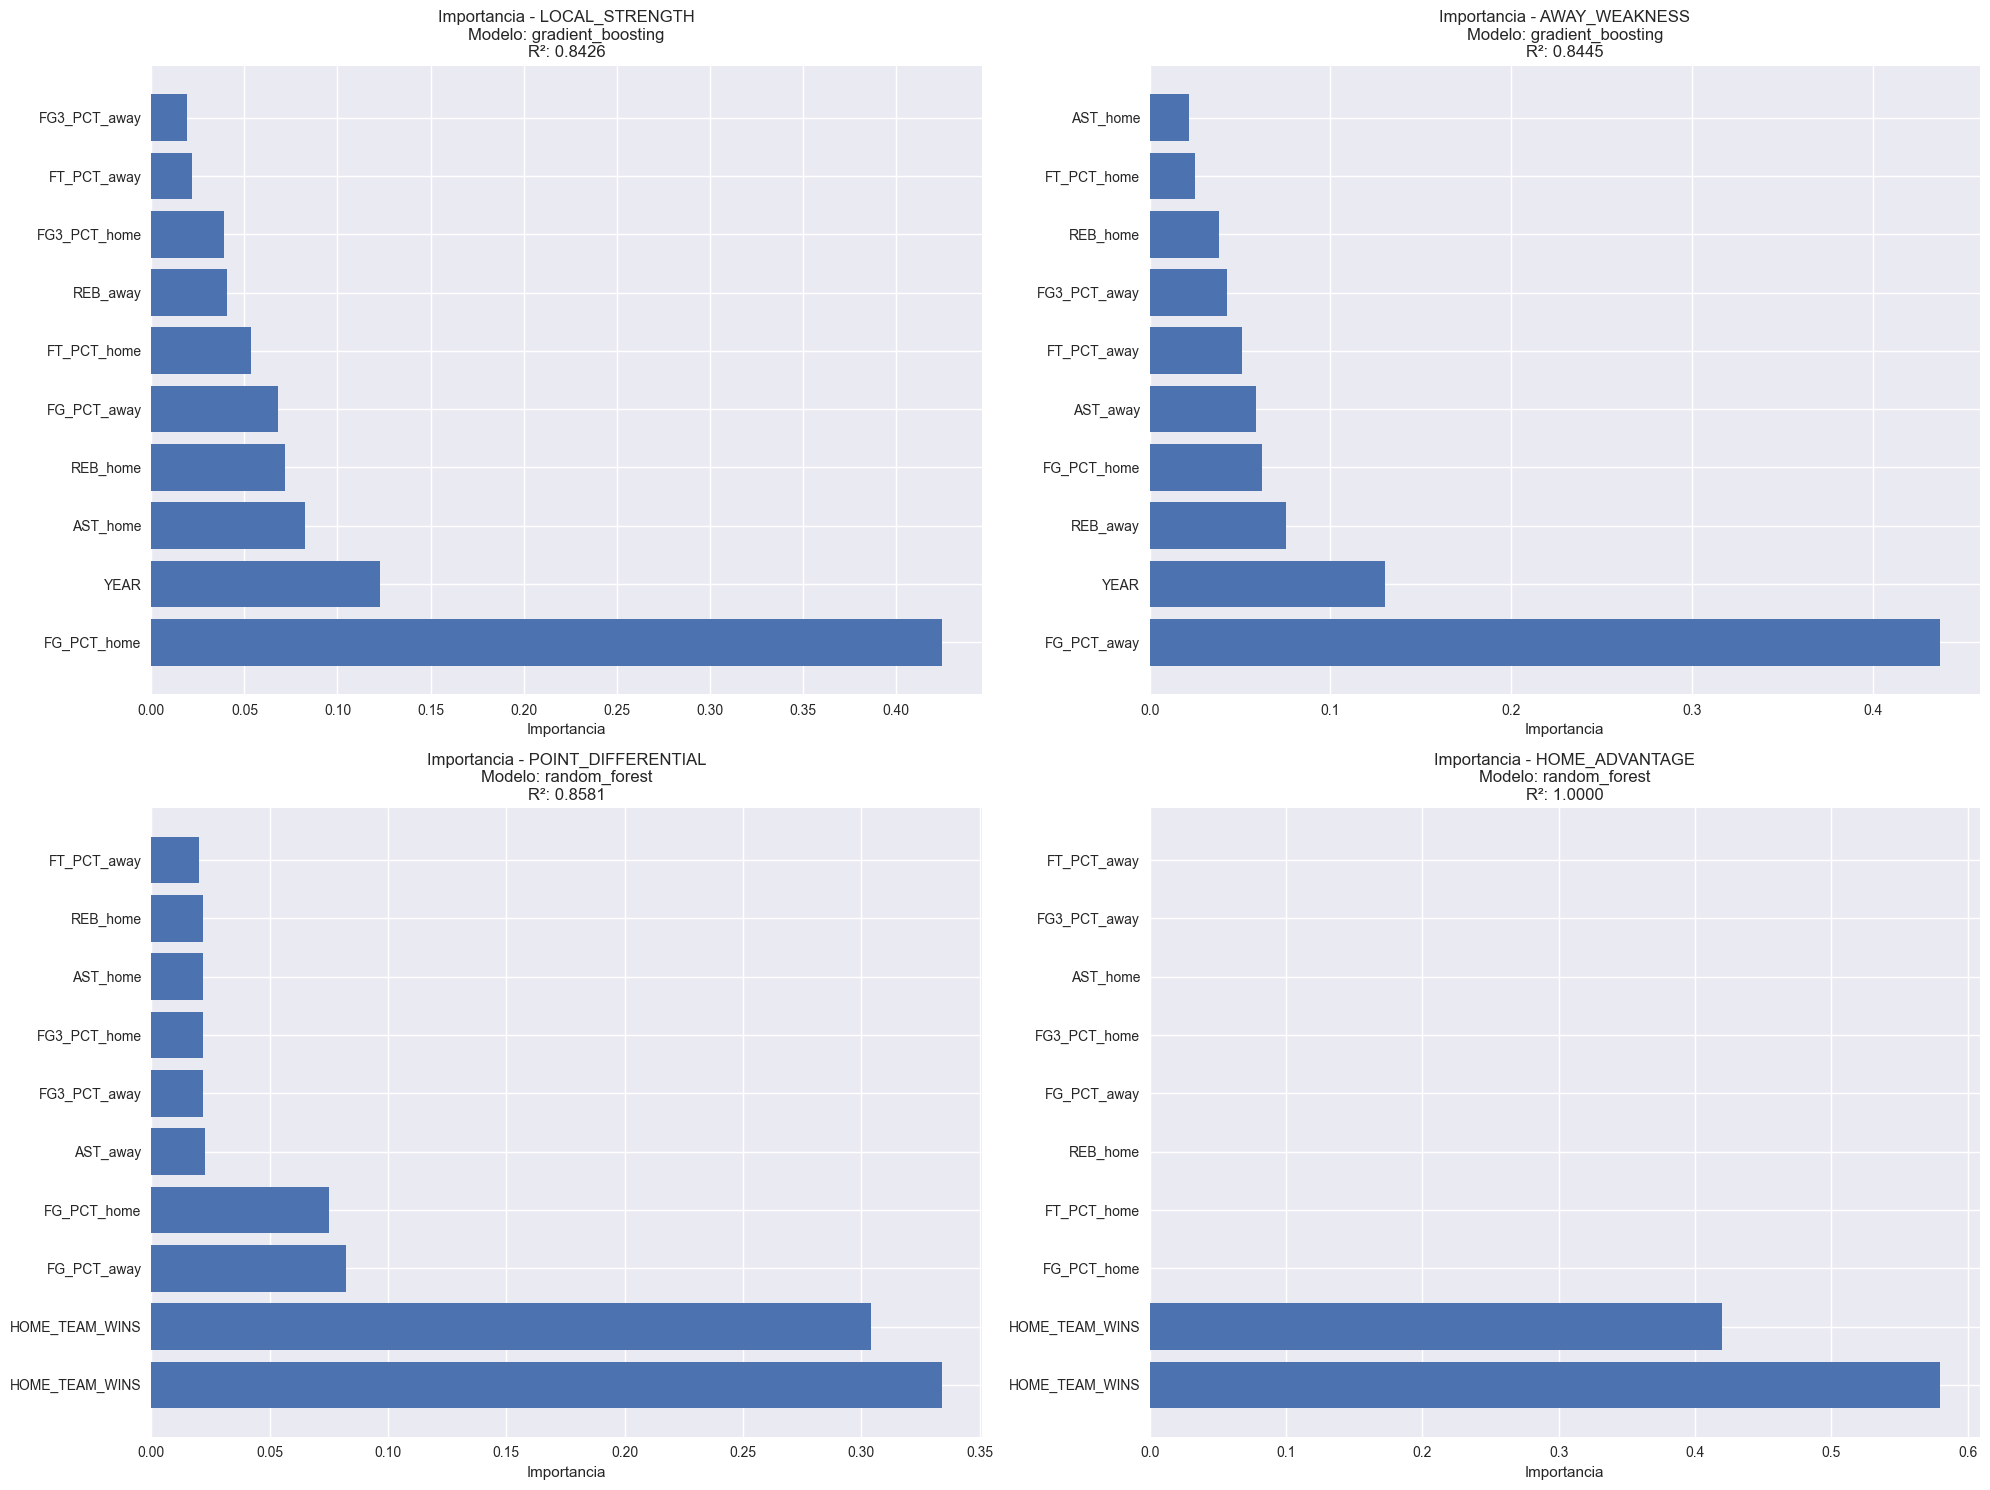

In [9]:
# =============================================================================
# 6. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS (VERSIÓN CORREGIDA)
# =============================================================================
def plot_feature_importance(models_results, features, top_n=10):
    """
    Grafica la importancia de características para los mejores modelos
    """
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.ravel()
    
    targets_to_plot = list(models_results.keys())
    
    for idx, target_name in enumerate(targets_to_plot[:4]):  # Máximo 4 gráficos
        if target_name not in models_results:
            continue
            
        results = models_results[target_name]
        best_model = results['best_model']
        
        try:
            # Obtener importancia de características
            if hasattr(best_model.named_steps['model'], 'feature_importances_'):
                importances = best_model.named_steps['model'].feature_importances_
                # 🎯 VERIFICAR LONGITUD
                if len(importances) != len(features):
                    print(f"⚠️  Longitud diferente en {target_name}: features({len(features)}) != importances({len(importances)})")
                    # Usar las características que realmente se usaron
                    feature_names_used = best_model.named_steps['scaler'].feature_names_in_
                    if feature_names_used is not None and len(feature_names_used) == len(importances):
                        features_used = feature_names_used
                    else:
                        # Tomar solo el número correcto de features
                        features_used = features[:len(importances)]
                else:
                    features_used = features
                    
            elif hasattr(best_model.named_steps['model'], 'coef_'):
                importances = np.abs(best_model.named_steps['model'].coef_)
                features_used = features[:len(importances)] if len(importances) != len(features) else features
            else:
                print(f"❌ Modelo {results['best_model_name']} no tiene importancias para {target_name}")
                continue
            
            # Crear DataFrame de importancia
            importance_df = pd.DataFrame({
                'feature': features_used,
                'importance': importances
            }).sort_values('importance', ascending=False).head(top_n)
            
            # Graficar
            axes[idx].barh(range(len(importance_df)), importance_df['importance'])
            axes[idx].set_yticks(range(len(importance_df)))
            axes[idx].set_yticklabels(importance_df['feature'])
            axes[idx].set_title(f'Importancia - {target_name.upper()}\n'
                              f'Modelo: {results["best_model_name"]}\n'
                              f'R²: {results["best_score"]:.4f}')
            axes[idx].set_xlabel('Importancia')
            
        except Exception as e:
            print(f"❌ Error graficando {target_name}: {str(e)}")
            # Mostrar información de debug
            if 'best_model' in locals():
                print(f"   Modelo: {results['best_model_name']}")
                print(f"   Tipo modelo: {type(best_model.named_steps['model'])}")
                if hasattr(best_model.named_steps['model'], 'feature_importances_'):
                    print(f"   Importancias shape: {best_model.named_steps['model'].feature_importances_.shape}")
            continue
    
    # Ocultar ejes vacíos
    for idx in range(len(targets_to_plot), 4):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Graficar importancia de características
plot_feature_importance(final_results, FEATURES)

In [10]:
# =============================================================================
# 7. RANKING DE EQUIPOS CORREGIDO
# =============================================================================
def create_team_rankings_con_equipos(df_clean, models_results, features):
    """
    Crea rankings usando los mismos datos de entrenamiento (que tienen equipos)
    """
    print("🏀 CREANDO RANKING DE EQUIPOS")
    print("="*50)
    
    rankings = {}
    
    for target_name, results in models_results.items():
        best_model = results['best_model']
        
        try:
            print(f"\n🎯 {target_name.upper()} - {results['best_model_name']}")
            
            # 🎯 USAR EXACTAMENTE LOS MISMOS DATOS DE ENTRENAMIENTO
            # Estos datos ya tienen TEAM_ABBREVIATION incluido
            X_pred = df_clean[features]
            teams = df_clean['TEAM_ABBREVIATION']
            
            # Predecir
            predictions = best_model.predict(X_pred)
            
            # Crear DataFrame con equipos y predicciones
            team_predictions = pd.DataFrame({
                'team': teams,
                'score': predictions
            })
            
            # Calcular promedio por equipo
            team_stats = team_predictions.groupby('team').agg({
                'score': ['mean', 'count', 'std']
            }).round(3)
            
            team_stats.columns = ['score_mean', 'games_count', 'score_std']
            team_stats = team_stats[team_stats['games_count'] >= 5]  # Mínimo 5 partidos
            
            # Ordenar por score
            team_ranking = team_stats['score_mean'].sort_values(ascending=False)
            rankings[target_name] = team_ranking
            
            # Mostrar ranking
            print(f"   Top 10 equipos ({len(team_ranking)} equipos total):")
            for i, (team, score) in enumerate(team_ranking.head(10).items(), 1):
                games = team_stats.loc[team, 'games_count']
                std = team_stats.loc[team, 'score_std']
                print(f"   {i:2d}. {team}: {score:.1f} ± {std:.1f} ({games} partidos)")
                
        except Exception as e:
            print(f"   ❌ Error: {str(e)}")
            continue
    
    return rankings

# Crear rankings
team_rankings = create_team_rankings_con_equipos(df_clean, final_results, FEATURES)

🏀 CREANDO RANKING DE EQUIPOS

🎯 LOCAL_STRENGTH - gradient_boosting
   Top 10 equipos (27 equipos total):
    1. DEN: 107.9 ± 12.9 (383 partidos)
    2. GSW: 106.6 ± 12.7 (409 partidos)
    3. OKC: 106.4 ± 11.7 (272 partidos)
    4. SAC: 105.6 ± 12.6 (382 partidos)
    5. MIN: 105.1 ± 13.0 (371 partidos)
    6. LAL: 105.0 ± 11.9 (408 partidos)
    7. WAS: 104.9 ± 13.4 (401 partidos)
    8. LAC: 104.7 ± 12.5 (363 partidos)
    9. MIL: 104.6 ± 12.9 (410 partidos)
   10. HOU: 104.4 ± 13.4 (376 partidos)

🎯 AWAY_WEAKNESS - gradient_boosting
   Top 10 equipos (27 equipos total):
    1. SAC: 104.8 ± 12.3 (382 partidos)
    2. DEN: 103.5 ± 11.9 (383 partidos)
    3. MIN: 102.9 ± 12.0 (371 partidos)
    4. OKC: 102.8 ± 13.0 (272 partidos)
    5. GSW: 102.7 ± 12.6 (409 partidos)
    6. LAL: 102.6 ± 12.2 (408 partidos)
    7. LAC: 102.3 ± 11.9 (363 partidos)
    8. WAS: 101.6 ± 12.8 (401 partidos)
    9. MIL: 101.5 ± 12.7 (410 partidos)
   10. CLE: 101.0 ± 13.4 (389 partidos)

🎯 POINT_DIFFERENTIA

In [11]:
# =============================================================================
# 8. REPORTE FINAL COMPARATIVO
# =============================================================================
print("📋 REPORTE FINAL DE MODELOS")
print("="*60)

# Crear DataFrame comparativo
comparison_data = []
for target_name, results in final_results.items():
    for model_name, metrics in results['results'].items():
        comparison_data.append({
            'Target': target_name,
            'Model': model_name,
            'CV_R2': metrics['cv_score'],
            'Test_R2': metrics['test_r2'],
            'MAE': metrics['test_mae'],
            'Best_Params': str(metrics['best_params'])[:100] + "..."  # truncar
        })

comparison_df = pd.DataFrame(comparison_data)
pivot_df = comparison_df.pivot_table(
    index='Model', 
    columns='Target', 
    values='Test_R2',
    aggfunc='first'
)

print("\n🎯 COMPARACIÓN DE R² POR MODELO Y TARGET:")
print(pivot_df.round(4))

print("\n🏆 MEJORES MODELOS POR TARGET:")
for target_name, results in final_results.items():
    print(f"   {target_name:>20}: {results['best_model_name']:>15} (R²: {results['best_score']:.4f})")

📋 REPORTE FINAL DE MODELOS

🎯 COMPARACIÓN DE R² POR MODELO Y TARGET:
Target             away_weakness  home_advantage  local_strength  \
Model                                                              
elastic_net               0.7967             1.0          0.7843   
gradient_boosting         0.8445             NaN          0.8426   
knn                       0.7284             1.0          0.7268   
lasso                     0.7967             1.0          0.7844   
random_forest             0.8067             1.0          0.8013   
ridge                     0.7967             1.0          0.7843   
svr                       0.8076             NaN          0.7975   

Target             point_differential  
Model                                  
elastic_net                    0.8203  
gradient_boosting              0.8575  
knn                            0.8261  
lasso                          0.8203  
random_forest                  0.8581  
ridge                          0.8203 